In [2]:
import pandas as pd

In [3]:
games_sales = pd.read_csv('vgsales.csv')
games_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
games_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
games_sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
games_sales['Year'] = games_sales['Year'].fillna(0)
games_sales.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [8]:
games_sales['Publisher'] = games_sales['Publisher'].fillna('UNKNOWN')
games_sales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
games_sales['Year'] = games_sales['Year'].astype(int)

games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [21]:
game_sales_by_publisher = games_sales.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False)
game_sales_by_publisher.head()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72


In [23]:
game_sales_by_publisher['JP_Sales'].corr(game_sales_by_publisher['Global_Sales'])

np.float64(0.7837883860442876)

In [24]:
game_sales_by_publisher['EU_Sales'].corr(game_sales_by_publisher['Global_Sales'])

np.float64(0.9851936084351536)

In [25]:
game_sales_by_publisher['NA_Sales'].corr(game_sales_by_publisher['Global_Sales'])

np.float64(0.9912537894794726)

In [26]:
game_sales_by_publisher['Other_Sales'].corr(game_sales_by_publisher['Global_Sales'])

np.float64(0.9322936192695775)

In [27]:
import matplotlib.pyplot as plt

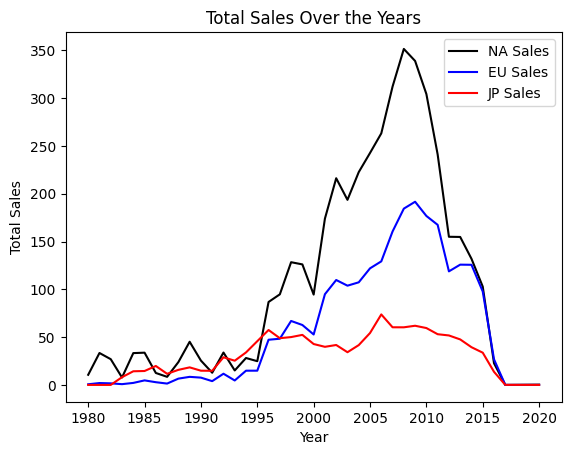

In [55]:
# Remove rows where the Year is 0
games_sales_cleaned = games_sales[games_sales['Year'] != 0]

# Calculate total sales per year for North America
total_sales_NA_per_year = games_sales_cleaned.groupby('Year')['NA_Sales'].sum()

# Plot the NA data
plt.plot(total_sales_NA_per_year.index, total_sales_NA_per_year.values, label='NA Sales', color='black')

# Calculate total sales per year for Europe Union
total_sales_EU_per_year = games_sales_cleaned.groupby('Year')['EU_Sales'].sum()

# Plot the EU data
plt.plot(total_sales_EU_per_year.index, total_sales_EU_per_year.values, label='EU Sales', color='blue')

# Calculate total sales per year for Japan
total_sales_Japan_per_year = games_sales_cleaned.groupby('Year')['JP_Sales'].sum()

# Plot the Japan data

plt.plot(total_sales_Japan_per_year.index, total_sales_Japan_per_year.values, label='JP Sales', color='red')

# Label the plot
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Over the Years')
plt.legend()

plt.savefig('TotalSalesOverTheYears.png', dpi=300)

# Show the plot
plt.show()




In [42]:
game_sales_by_platform_in_different_genre = games_sales.pivot_table(
    index='Platform', 
    columns='Genre', 
    values='Global_Sales', 
    aggfunc='sum', 
    margins=True
)

game_sales_by_platform_in_different_genre = game_sales_by_platform_in_different_genre.fillna(0.00)
game_sales_by_platform_in_different_genre = game_sales_by_platform_in_different_genre.sort_values(by='All', ascending=False)
game_sales_by_platform_in_different_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
All,1751.18,239.04,448.91,809.96,831.37,244.95,732.04,927.37,1037.37,392.20,1330.93,175.12,8920.44
PS2,272.76,21.16,92.60,101.14,72.51,5.90,156.28,93.50,108.57,42.66,273.41,15.15,1255.64
X360,242.67,15.23,37.64,91.96,11.39,0.85,65.99,71.98,278.55,14.45,139.12,10.13,979.96
PS3,307.88,22.90,51.70,47.85,30.33,0.60,73.95,75.30,196.04,10.79,135.56,4.94,957.84
Wii,118.58,18.43,23.86,221.06,90.74,15.67,61.28,14.06,28.77,36.97,292.06,5.23,926.71
DS,115.56,47.29,7.20,137.76,77.45,84.29,38.64,126.85,8.20,132.03,31.83,15.39,822.49
PS,127.05,20.97,72.68,44.90,64.21,12.08,103.19,78.30,39.31,25.33,120.97,21.67,730.66
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45,318.50
PSP,64.72,10.69,21.97,13.96,17.28,5.52,34.73,49.05,19.77,6.28,41.69,10.62,296.28


In [44]:
count_of_games_by_genre = games_sales.groupby('Genre')['Name'].count()
count_of_games_by_genre.sort_values(ascending = False)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Name, dtype: int64

In [50]:
games_sales_cleaned = games_sales[games_sales['Year'] != 0]
count_of_games_by_genre_throught_years = games_sales_cleaned.pivot_table(
    index='Genre', 
    columns='Year', 
    values='Name', 
    aggfunc='count', 
    margins=True
)
count_of_games_by_genre_throught_years = count_of_games_by_genre_throught_years.fillna(0.0)
count_of_games_by_genre_throught_years = count_of_games_by_genre_throught_years.sort_values(by='All', ascending=False)
count_of_games_by_genre_throught_years

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,All
Genre,,,,,,,,,,,,,,,,,,,,,
All,9.0,46.0,36.0,17.0,14.0,14.0,21.0,16.0,15.0,17.0,...,1259.0,1139.0,657.0,546.0,582.0,614.0,344.0,3.0,1.0,16327
Action,1.0,25.0,18.0,7.0,1.0,2.0,6.0,2.0,2.0,2.0,...,226.0,239.0,266.0,148.0,186.0,255.0,119.0,1.0,0.0,3253
Sports,1.0,4.0,2.0,1.0,2.0,1.0,3.0,4.0,2.0,3.0,...,186.0,122.0,54.0,53.0,55.0,62.0,38.0,0.0,0.0,2304
Misc,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,201.0,184.0,38.0,42.0,41.0,39.0,18.0,0.0,0.0,1710
Role-Playing,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,...,103.0,95.0,78.0,71.0,91.0,78.0,40.0,2.0,0.0,1471
Shooter,2.0,10.0,5.0,1.0,3.0,1.0,4.0,2.0,1.0,1.0,...,81.0,94.0,48.0,59.0,47.0,34.0,32.0,0.0,0.0,1282
Adventure,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,154.0,108.0,58.0,60.0,75.0,54.0,34.0,0.0,0.0,1276
Racing,0.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,...,57.0,65.0,30.0,16.0,27.0,19.0,20.0,0.0,0.0,1226
Platform,0.0,3.0,5.0,5.0,1.0,4.0,6.0,2.0,4.0,3.0,...,31.0,37.0,12.0,37.0,10.0,14.0,10.0,0.0,0.0,876


In [51]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
with pd.ExcelWriter('GAMES_SALES_Python.xlsx', engine = 'openpyxl') as writer:
    game_sales_by_publisher.to_excel(writer, sheet_name = 'sales_by_publisher')
    game_sales_by_platform_in_different_genre.to_excel(writer, sheet_name = 'sales_by_platform_genre')
    count_of_games_by_genre.to_excel(writer, sheet_name = 'count_of_games_by_genre')
    count_of_games_by_genre_throught_years.to_excel(writer, sheet_name = 'count_of_games_by_genre_years')